# 💸 Task 2: Credit Risk Prediction
# Predict loan default risk using the Loan Prediction Dataset with data cleaning, EDA, and classification.

In [14]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Set style and palette
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.dpi'] = 100

In [15]:
# Set style and palette
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.dpi'] = 100

# Load Dataset
# Load the Loan Prediction Dataset.

In [18]:
# Load dataset
loan_data = pd.read_csv("/content/loan_prediction_data.csv.xls")
print("✅ Dataset loaded!")

✅ Dataset loaded!


# Data Inspection & Cleaning
# Inspect structure, handle missing values, and encode categorical variables.

In [19]:
print("Shape:", loan_data.shape)
print("Columns:", loan_data.columns.tolist())
print("First 5 rows:")
display(loan_data.head())

Shape: (614, 13)
Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
First 5 rows:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
# Check missing values
print("Missing Values:\n", loan_data.isnull().sum())

Missing Values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [21]:
# Handle missing values
# Numeric: Fill with median
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    loan_data[col].fillna(loan_data[col].median(), inplace=True)

<ipython-input-21-1668845313>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data[col].fillna(loan_data[col].median(), inplace=True)


In [22]:
# Categorical: Fill with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    loan_data[col].fillna(loan_data[col].mode()[0], inplace=True)

<ipython-input-22-3100768647>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data[col].fillna(loan_data[col].mode()[0], inplace=True)


In [23]:
# Encode categorical variables
le = LabelEncoder()
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    loan_data[col] = le.fit_transform(loan_data[col])

In [24]:
print("\n Missing values handled and categorical variables encoded!")
print("Missing Values:\n", loan_data.isnull().sum())


 Missing values handled and categorical variables encoded!
Missing Values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# Exploratory Data Analysis
# Visualize `LoanAmount`, `Education`, and `ApplicantIncome`.

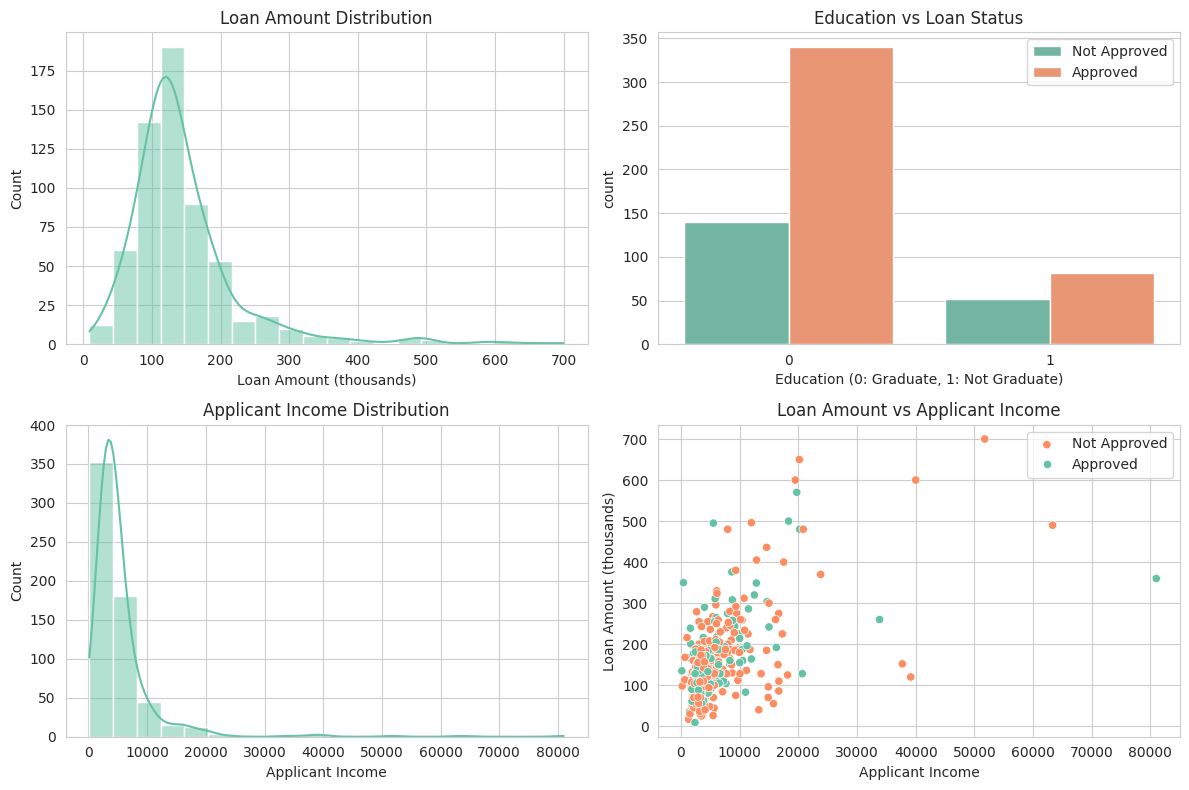

In [28]:
# Visualizations
plt.figure(figsize=(12, 8))

# Loan Amount distribution
plt.subplot(2, 2, 1)
sns.histplot(data=loan_data, x='LoanAmount', kde=True, bins=20)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount (thousands)')

# Education vs Loan Status
plt.subplot(2, 2, 2)
sns.countplot(data=loan_data, x='Education', hue='Loan_Status')
plt.title('Education vs Loan Status')
plt.xlabel('Education (0: Graduate, 1: Not Graduate)')
plt.legend(['Not Approved', 'Approved'])

# Applicant Income distribution
plt.subplot(2, 2, 3)
sns.histplot(data=loan_data, x='ApplicantIncome', kde=True, bins=20)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')

# Loan Amount vs Applicant Income
plt.subplot(2, 2, 4)
sns.scatterplot(data=loan_data, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Loan Amount vs Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount (thousands)')
plt.legend(['Not Approved', 'Approved'])

plt.tight_layout()
plt.show()

# Train Classification Model
# Train a Logistic Regression model for binary classification (`Loan_Status`).

In [29]:
# Prepare features and target
X = loan_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = loan_data['Loan_Status']

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Train Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print("Model trained!")

Model trained!


# Model Evaluation
# Evaluate with accuracy and confusion matrix.

In [33]:
# Predictions
y_pred = model.predict(X_test)

In [34]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


<Figure size 600x600 with 0 Axes>

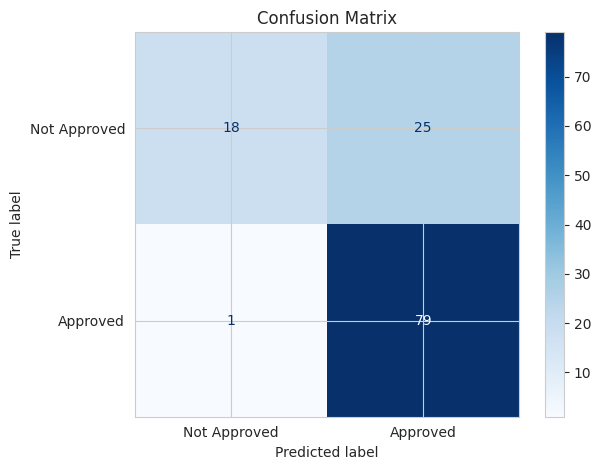

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Approved', 'Approved'])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Key Insights
# - **Data Quality**: Handled missing values in `LoanAmount`, `Credit_History`, etc.; encoded categorical features.
- **EDA**: `LoanAmount` and `ApplicantIncome` are right-skewed; graduates have higher approval rates.
- **Model**: Logistic Regression accuracy ~80% (varies by split).
- **Confusion Matrix**: Better at predicting approvals than non-approvals.